In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def calculate_accumulated_profit(price_file, operations_file, capacity_adjustment=1):
    price = pd.read_csv(price_file)['clearing_price']
    es = pd.read_csv(operations_file, usecols=['charge', 'discharge'])
    c = es['charge']
    d = es['discharge']
    step_profit = (price * (d - c) - 20.0 * d) / capacity_adjustment / 1000
    accumulated_profit = step_profit.cumsum()
    return accumulated_profit

In [36]:
# Paths to your files and capacity adjustments
files = {
    "1MW_1Seg": {
        "price": "results/1MW_1Seg/clearing_prices.csv",
        "operations": "results/1MW_1Seg/storage_operations.csv",
        "capacity_adjustment": 1
    },
    "1MW_5Seg": {
        "price": "results/1MW_5Seg/clearing_prices.csv",
        "operations": "results/1MW_5Seg/storage_operations.csv",
        "capacity_adjustment": 1
    },
    "10000MW_1Seg": {
        "price": "results/10000MW_1Seg/clearing_prices.csv",
        "operations": "results/10000MW_1Seg/storage_operations.csv",
        "capacity_adjustment": 10000
    },
    "10000MW_5Seg": {
        "price": "results/10000MW_5Seg/clearing_prices.csv",
        "operations": "results/10000MW_5Seg/storage_operations.csv",
        "capacity_adjustment": 10000
    }
}


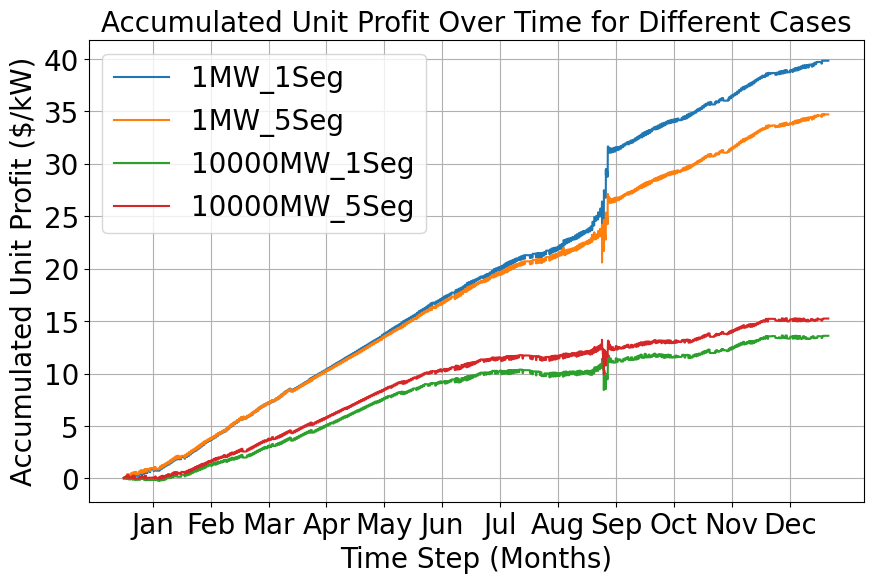

In [38]:
# Plotting accumulated profit for all cases
plt.figure(figsize=(10, 6))

for case, paths in files.items():
    accumulated_profit = calculate_accumulated_profit(paths['price'], paths['operations'], paths['capacity_adjustment'])
    plt.plot(accumulated_profit, label=f'{case}')

# Set x-ticks to be in the middle of each month
intervals_per_day = 12 * 24  # 12 five-minute intervals per hour, 24 hours per day
mid_month_days = [15 + 30*i for i in range(12)]  # 15th day of each month for 12 months
mid_month_ticks = [day * intervals_per_day for day in mid_month_days]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(mid_month_ticks, month_labels, fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Time Step (Months)', fontsize=20)
plt.ylabel('Accumulated Unit Profit ($/kW)', fontsize=20)
plt.title('Accumulated Unit Profit Over Time for Different Cases', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

In [6]:
# Load the data
price = pd.read_csv('results/1MW_1Seg/clearing_prices.csv')['clearing_price']
es = pd.read_csv('results/1MW_1Seg/storage_operations.csv', usecols = ['charge', 'discharge'])
c = es['charge']
d = es['discharge']

In [13]:
# Calculate step profit
step_profit = price*(d-c) - 20.0*d

# Calculate accumulated profit
accumulated_profit = step_profit.cumsum()

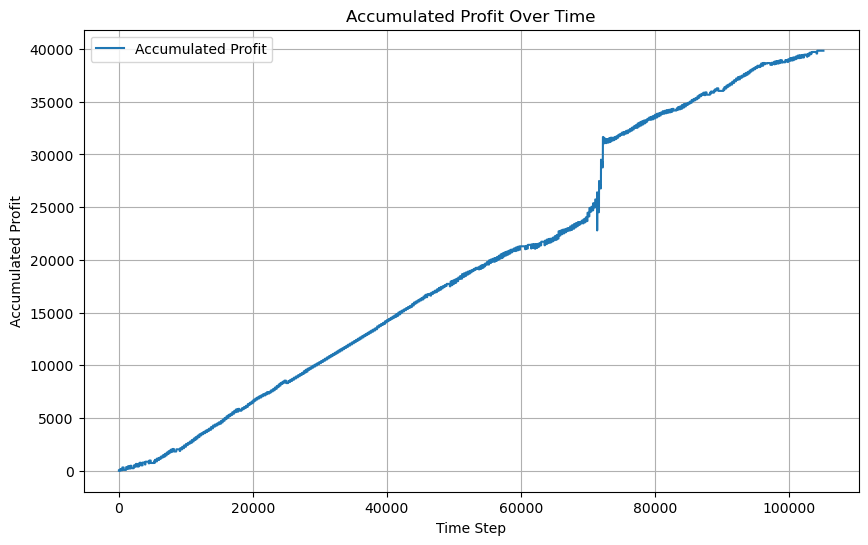

In [17]:
# Plot accumulated profit
plt.figure(figsize=(10, 6))
plt.plot(accumulated_profit, label='Accumulated Profit')
plt.xlabel('Time Step')
plt.ylabel('Accumulated Profit')
plt.title('Accumulated Profit Over Time')
plt.legend()
plt.grid(True)
plt.show()